# **THEORY**

In [2]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 4.7 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=4bd84b4859851132b1b93bf77f56d9b423a15381d07b6c9c4011fef9b9faf396
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt

**TRIANGLE**

In [ ]:
x = np.arange(11)
mfx = fuzz.trimf(x,[0,5,10])

In [ ]:
display(mfx)

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

In [ ]:
x = np.arange(30,80.1,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])

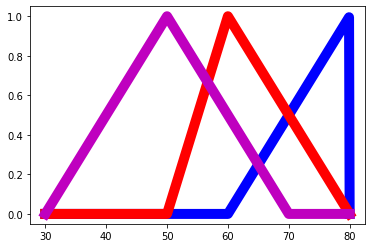

In [ ]:
plt.figure()
plt.plot(x,full_speed,'b', linewidth= 10, label = 'Full speed')
plt.plot(x,medium_fast,'r', linewidth= 10, label = 'Medium fast')
plt.plot(x,medium,'m', linewidth= 10, label = 'Medium')

**TRAPIZOL**

In [ ]:
trap = fuzz.trapmf(x,[30,45,65,80])

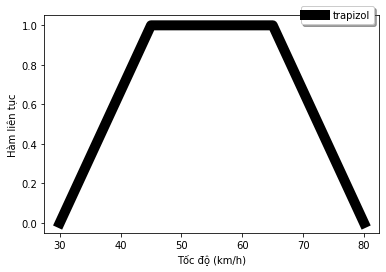

In [ ]:
plt.figure()
plt.plot(x,trap,'k', linewidth= 10, label = 'trapizol')
plt.xlabel('Tốc độ (km/h)')
plt.ylabel('Hàm liên tục')
plt.legend(loc = 'center right', bbox_to_anchor = (1,1), ncol = 1, fancybox = True, shadow = True)

**GAUSSIAN DISTRIBUTION**

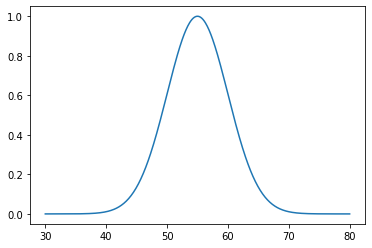

In [ ]:
gauss = fuzz.gaussmf(x,55,5)
plt.plot(x,gauss)

**BELL DISTRIBUTION**

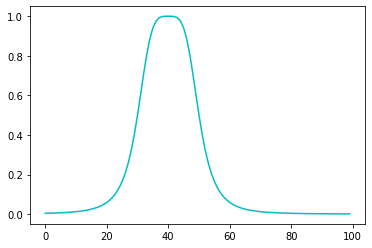

In [ ]:
x1 = np.arange(100)
bell = fuzz.gbellmf(x1,10,2,40)
plt.plot(x1,bell,'c')

**SIGMOID FUNCTION**

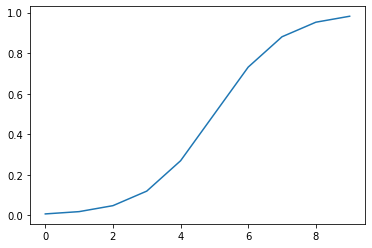

In [ ]:
x2 = np.arange(10)
sigmoid = fuzz.sigmf(x2,5,1)
plt.plot(x2,sigmoid)

# WEEK 3

##**FUZZY LOGIC PROBLEM**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Create input food signal
food = ctrl.Antecedent(np.arange(0,11,1),'Food')
# input Service
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
# output Tips
tips = ctrl.Consequent(np.arange(10,26,1),'Tips')

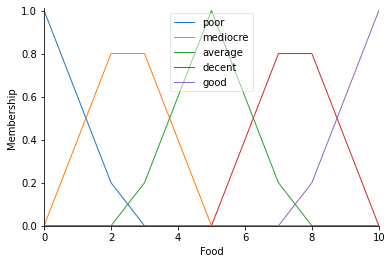

In [ ]:
# Create membership function automatically
food.automf(5)
food.view()

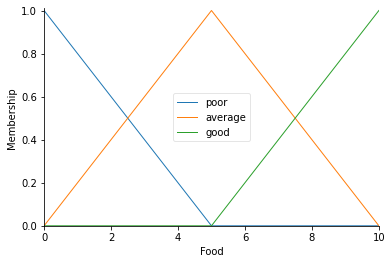

In [ ]:
# Create membership function in detail FOR FOOD
food['poor'] = fuzz.trimf(food.universe, [0,0,5])
food['average'] = fuzz.trimf(food.universe, [0,5,10])
food['good'] = fuzz.trimf(food.universe, [5,10,10])
food.view()

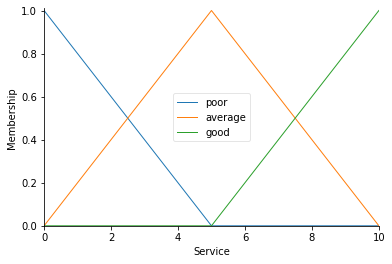

In [ ]:
# Create membership function in detail FOR SERVICE
service['poor'] = fuzz.trimf(service.universe, [0,0,5])
service['average'] = fuzz.trimf(service.universe, [0,5,10])
service['good'] = fuzz.trimf(service.universe, [5,10,10])
service.view()

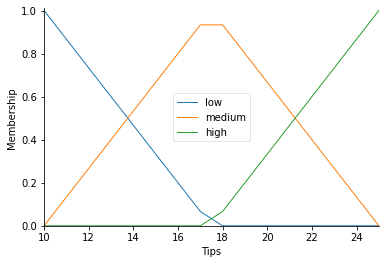

In [ ]:
# Create membership function in detail FOR TIPS
tips['low'] = fuzz.trimf(tips.universe, [10,10,17.5])
tips['medium'] = fuzz.trimf(tips.universe, [10,17.5,25])
tips['high'] = fuzz.trimf(tips.universe, [17.5,25,25])
tips.view()

In [ ]:
#Create rules
rule1 = ctrl.Rule(antecedent = food['poor'] & service['poor'], consequent = tips['low'])
rule2 = ctrl.Rule(antecedent = food['poor'] & service['average'], consequent = tips['low'])
rule3 = ctrl.Rule(antecedent = food['poor'] & service['good'], consequent = tips['low'])
rule4 = ctrl.Rule(antecedent = food['average'] & service['poor'], consequent = tips['low'])
rule5 = ctrl.Rule(antecedent = food['average'] & service['average'], consequent = tips['medium'])
rule6 = ctrl.Rule(antecedent = food['average'] & service['good'], consequent = tips['high'])
rule7 = ctrl.Rule(antecedent = food['good'] & service['poor'], consequent = tips['medium'])
rule8 = ctrl.Rule(antecedent = food['good'] & service['average'], consequent = tips['high'])
rule9 = ctrl.Rule(antecedent = food['good'] & service['good'], consequent = tips['high'])

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [ ]:
tipping.inputs({'Food':6.5,'Service':9.8})
tipping.compute()
print('tips =',tipping.output['Tips'])

tips = 21.634368145395946


## **Calculation for cooker's power**

In [ ]:
# Create input and output variable
time = ctrl.Antecedent(np.arange(20,101),label ='time')
rice =  ctrl.Antecedent(np.arange(0,1.1,0.1),label ='rice')
power = ctrl.Consequent(np.arange(0,101), label = 'power')

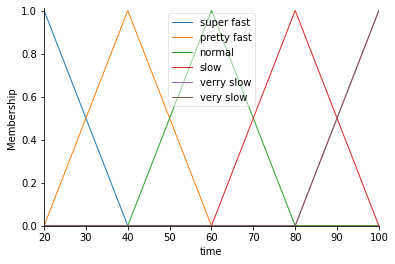

In [ ]:
#Create membership function
time['super fast'] = fuzz.trimf(time.universe, [20,20,40])
time['pretty fast'] = fuzz.trimf(time.universe, [20,40,60])
time['normal'] = fuzz.trimf(time.universe, [40,60,80])
time['slow'] = fuzz.trimf(time.universe, [60,80,100])
time['very slow'] = fuzz.trimf(time.universe, [80,100,100])
time.view()

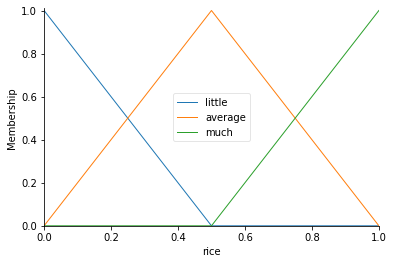

In [ ]:
rice['little']= fuzz.trimf(rice.universe, [0,0,0.5])
rice['average'] = fuzz.trimf(rice.universe, [0,0.5,1])
rice['much'] = fuzz.trimf(rice.universe, [0.5,1,1])
rice.view()

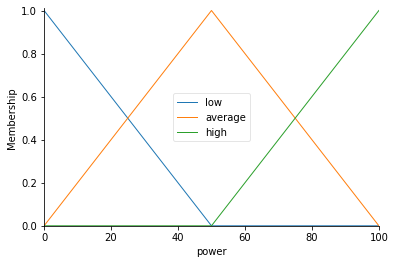

In [ ]:
power['low']= fuzz.trimf(power.universe, [0,0,50])
power['average'] = fuzz.trimf(power.universe, [0,50,100])
power['high'] = fuzz.trimf(power.universe, [50,100,100])
power.view()

In [ ]:
#Create rules
rule1 = ctrl.Rule(antecedent = time['super fast'] & rice['little'], consequent = power['high'])
rule2 = ctrl.Rule(antecedent = time['super fast'] & rice['average'], consequent = power['high'])
rule3 = ctrl.Rule(antecedent = time['super fast'] & rice['much'], consequent = power['high'])
rule4 = ctrl.Rule(antecedent = time['pretty fast'] & rice['little'], consequent = power['average'])
rule5 = ctrl.Rule(antecedent = time['pretty fast'] & rice['average'], consequent = power['high'])
rule6 = ctrl.Rule(antecedent = time['pretty fast'] & rice['much'], consequent = power['high'])
rule7 = ctrl.Rule(antecedent = time['normal'] & rice['little'], consequent = power['average'])
rule8 = ctrl.Rule(antecedent = time['normal'] & rice['average'], consequent = power['high'])
rule9 = ctrl.Rule(antecedent = time['normal'] & rice['much'], consequent = power['high'])
rule10 = ctrl.Rule(antecedent = time['slow'] & rice['little'], consequent = power['low'])
rule11 = ctrl.Rule(antecedent = time['slow'] & rice['average'], consequent = power['average'])
rule12 = ctrl.Rule(antecedent = time['slow'] & rice['much'], consequent = power['average'])
rule13 = ctrl.Rule(antecedent = time['very slow'] & rice['little'], consequent = power['low'])
rule14 = ctrl.Rule(antecedent = time['very slow'] & rice['average'], consequent = power['low'])
rule15 = ctrl.Rule(antecedent = time['very slow'] & rice['much'], consequent = power['average'])

In [ ]:
power_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
power_predict = ctrl.ControlSystemSimulation(power_ctrl)

In [ ]:
power_predict.inputs({'rice':0.6,'time':80})
power_predict.compute()
print('power =',power_predict.output['power'])

power = 50.00000000000001


## **Prediction of rainfall using fuzzy logic**

In [ ]:
# Create input and output variable
WS = ctrl.Antecedent(np.arange(0.7,3.2,0.1),label ='windspeed')
TP =  ctrl.Antecedent(np.arange(20.4,41.2,0.8),label ='temperature')
RF = ctrl.Consequent(np.arange(0.2,9.2,0.1), label = 'rainfall')

In [ ]:
def membership_func(var):
  range = max(var.universe) - min(var.universe)
  var['very low'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.25*range])
  var['low'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe) + 0.25*range , min(var.universe) + 0.5*range])
  var['normal'] = fuzz.trimf(var.universe, [min(var.universe) + 0.25*range ,min(var.universe) + 0.5*range , min(var.universe) + 0.75*range])
  var['high'] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range ,min(var.universe) + 0.75*range, max(var.universe)])
  var['very high'] = fuzz.trimf(var.universe, [min(var.universe) + 0.75*range , max(var.universe), max(var.universe)])

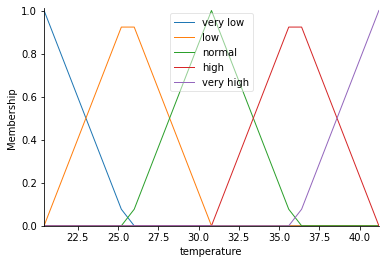

In [ ]:
#Create membership function for temperature
membership_func(TP)
TP.view()

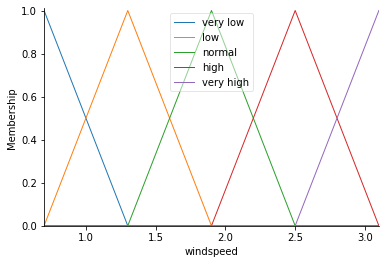

In [ ]:
#Create membership function for windspeed
membership_func(WS)
WS.view()

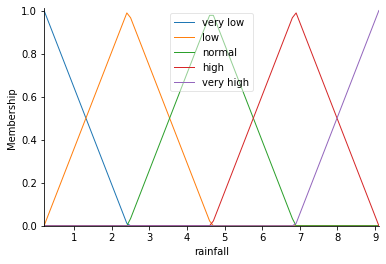

In [ ]:
#Create membership function for rainfall
membership_func(RF)
RF.view()

In [ ]:
#Create rules
rule1 = ctrl.Rule(antecedent = WS['very low'] & TP['very low'], consequent = RF['very low'])
rule2 = ctrl.Rule(antecedent = WS['low'] & TP['low'], consequent = RF['very low'])
rule3 = ctrl.Rule(antecedent = WS['very high'] & TP['very high'], consequent = RF['very high'])
rule4 = ctrl.Rule(antecedent = WS['low'] & TP['very low'], consequent = RF['very low'])
rule5 = ctrl.Rule(antecedent = WS['high'] & TP['very high'], consequent = RF['high'])
rule6 = ctrl.Rule(antecedent = WS['very high'] & TP['normal'], consequent = RF['high'])

In [ ]:
# Create ControlSystem
RF_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6])
RF_predict = ctrl.ControlSystemSimulation(RF_ctrl)

In [ ]:
RF_predict.inputs({'windspeed':2.6,'temperature':38})
RF_predict.compute()
print('Rainfall =',RF_predict.output['rainfall'])

Rainfall = 6.92064439612172


## **Intelligent Size Matching Recommender System: Fuzzy Logic Approach in Children Clothing Selection**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
#Dataset of children body size measurement
size = pd.DataFrame({'Darwish':[125,22.1,61,55,9], 'Danish':[139,33.4,67,63,12],'Arif':[129,21.2,58,53,9], 'Adam':[125,19.3,56,51,7], 'Irfan':[144.5,29,66,56,12], 'Daniel':[122,20.2,56,48,8],
                     'Iqbal':[148,30.9,64,58.5,12], 'Irdina':[134,27.7,64,61,10], 'Puteri':[112,18.4,55,49,8]}, index=['Height', 'Weight', 'Chest', 'Waist', 'Age'])
display(size)

,Darwish,Danish,Arif,Adam,Irfan,Daniel,Iqbal,Irdina,Puteri
Height,125.0,139.0,129.0,125.0,144.5,122.0,148.0,134.0,112.0
Weight,22.1,33.4,21.2,19.3,29.0,20.2,30.9,27.7,18.4
Chest,61.0,67.0,58.0,56.0,66.0,56.0,64.0,64.0,55.0
Waist,55.0,63.0,53.0,51.0,56.0,48.0,58.5,61.0,49.0
Age,9.0,12.0,9.0,7.0,12.0,8.0,12.0,10.0,8.0


In [ ]:
# Triangular fuzzy numbers for height
height_param = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/height_parameters.csv',
                           names=['4-5','5-6','6-8','7-8','8-9','9-10','10-11','11-12','12-13','13-14'], 
                           index_col=False)
height_param.index = ['a','b','c']
display(height_param)

,4-5,5-6,6-8,7-8,8-9,9-10,10-11,11-12,12-13,13-14
a,93.50,93.50,93.50,93.50,93.50,93.5,93.50,93.50,93.50,93.50
b,106.15,111.94,117.73,123.52,129.31,135.1,140.89,146.68,152.47,158.26
c,110.00,116.00,122.00,128.00,134.00,140.0,146.00,152.00,158.00,164.00


In [ ]:
# Triangular fuzzy numbers for weight
chest_param = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/chest_parameters.csv',
                           names=['4-5','5-6','6-8','7-8','8-9','9-10','10-11','11-12','12-13','13-14'], 
                           index_col=False)
chest_param.index = ['a','b','c']
display(chest_param)

,4-5,5-6,6-8,7-8,8-9,9-10,10-11,11-12,12-13,13-14
a,49.30,49.30,49.3,49.30,49.3,49.3,49.30,49.30,49.3,49.30
b,55.97,58.38,60.8,62.73,66.1,69.0,71.89,75.27,77.2,79.61
c,58.00,60.50,63.0,65.00,68.5,71.5,74.50,78.00,80.0,82.50


In [ ]:
# Triangular fuzzy numbers for waist
waist_param = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/waist_parameters.csv',
                           names=['4-5','5-6','6-8','7-8','8-9','9-10','10-11','11-12','12-13','13-14'], 
                           index_col=False)
waist_param.index = ['a','b','c']
display(waist_param)

,4-5,5-6,6-8,7-8,8-9,9-10,10-11,11-12,12-13,13-14
a,46.75,46.75,46.75,46.75,46.75,46.75,46.75,46.75,46.75,46.75
b,53.08,54.04,55.01,55.97,57.90,59.59,61.76,63.21,64.17,64.90
c,55.00,56.00,57.00,58.00,60.00,61.75,64.00,65.50,66.50,67.25


In [ ]:
# Define membership function
def tri_membership(data, var):
  cloth_size = data.columns
  N = len(cloth_size)
  for i in range(N):
    var[cloth_size[i]] = fuzz.trimf(var.universe, [data[cloth_size[i]][0], data[cloth_size[i]][1], data[cloth_size[i]][2]]) 

def triangular(x,a,b,c):
  return max(min((x-a)/(b-a),(c-x)/(c-b)),0) # trimf membership function

In [ ]:
# Create input and output variable
height = ctrl.Antecedent(np.linspace(93.5,164,50),label ='height')
chest =  ctrl.Antecedent(np.linspace(49.3,82.5,50),label ='chest')
waist = ctrl.Consequent(np.linspace(46.75,67.25,50), label = 'waist')

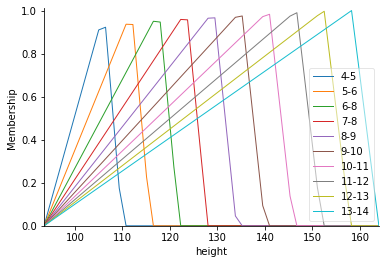

In [ ]:
# Create membership function for height
tri_membership(height_param, height)
height.view()

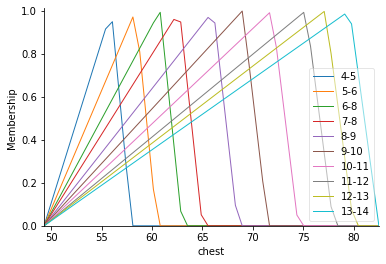

In [ ]:
# Create membership function for weight
tri_membership(chest_param, chest)
chest.view()

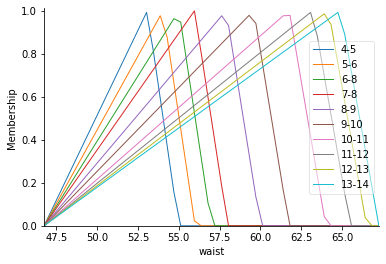

In [ ]:
# Create membership function for waist
tri_membership(waist_param, waist)
waist.view()

In [ ]:
# Define fucntion to predict right clothing size for children
def recommend(name,size):
  height_size = size[name][0]
  chest_size = size[name][2]
  waist_size = size[name][3]
  membership_values_table = pd.DataFrame(np.zeros((3,10)), columns = height_param.columns, index = ['height', 'chest', 'waist'])
  min_value = []
  for age in membership_values_table.columns:
    membership_values_table.loc['height',age] = triangular(height_size, height_param.loc['a',age], height_param.loc['b',age], height_param.loc['c',age])
    membership_values_table.loc['chest',age] = triangular(chest_size, chest_param.loc['a',age], chest_param.loc['b',age], chest_param.loc['c',age])
    membership_values_table.loc['waist',age] = triangular(waist_size, waist_param.loc['a',age], waist_param.loc['b',age], waist_param.loc['c',age])
    min_value.append(min(membership_values_table[age]))
  membership_values_table.loc['Min_value'] = min_value
  predict_size = membership_values_table.columns[min_value.index(max(min_value))]
  print(f"Recommended cloth's size for {name} is {predict_size}")


In [ ]:
# Predict size
for name in size.columns:
  recommend(name,size)

Recommended cloth's size for Darwish is 8-9
Recommended cloth's size for Danish is 11-12
Recommended cloth's size for Arif is 8-9
Recommended cloth's size for Adam is 7-8
Recommended cloth's size for Irfan is 11-12
Recommended cloth's size for Daniel is 7-8
Recommended cloth's size for Iqbal is 11-12
Recommended cloth's size for Irdina is 10-11
Recommended cloth's size for Puteri is 5-6


#**Medical Diagnosis System Using Fuzzy Logic**

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
#define fucntion to initiate input variable
def Antecedent(min,max,range,label):
  return ctrl.Antecedent(np.arange(min,max,range),label)

In [ ]:
symptons = ['Fever', 'Headache', 'Nausea', 'Vomiting', 'Jaudice', 'Enlarge Fever', 'Joint Pain', 'Body weakness', 'Dizziness', 'Loss of Appetite', 'MP']
degrees = ['Mild', 'Moderate', 'Severe', 'Very Severe']
inputs = {}
for sympton in symptons:
  inputs[sympton] = Antecedent(0.1,1.05,0.05,sympton)
  inputs[sympton][degrees[0]] = fuzz.trimf(inputs[sympton].universe, [0.1,0.2,0.3])
  inputs[sympton][degrees[1]] = fuzz.trimf(inputs[sympton].universe, [0.3,0.45,0.6])
  inputs[sympton][degrees[2]] = fuzz.trimf(inputs[sympton].universe, [0.6,0.7,0.8])
  inputs[sympton][degrees[3]] = fuzz.trimf(inputs[sympton].universe, [0.8,0.9,1])


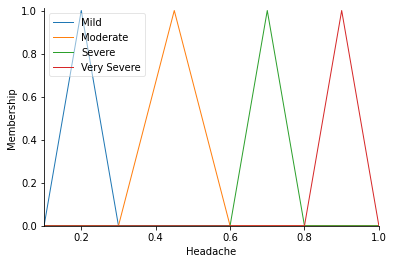

In [ ]:
inputs['Headache'].view()

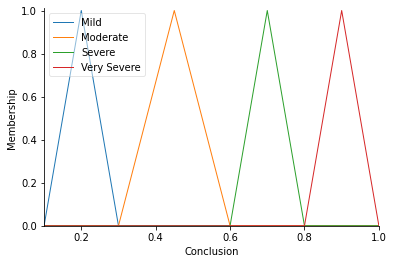

In [ ]:
# Defind output
Conclusion = ctrl.Consequent(np.arange(0.1,1.05,0.05), label = 'Conclusion')
Conclusion['Mild'] = fuzz.trimf(Conclusion.universe, [0.1,0.2,0.3])
Conclusion['Moderate'] = fuzz.trimf(Conclusion.universe, [0.3,0.45,0.6])
Conclusion['Severe'] = fuzz.trimf(Conclusion.universe, [0.6,0.7,0.8])
Conclusion['Very Severe'] = fuzz.trimf(Conclusion.universe, [0.8,0.9,1])
Conclusion.view()

In [ ]:
# Create rule table'
rules_table = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/symptons_data1.txt', names=['Fever', 'Headache', 'Nausea', 'Vomiting', 'Jaudice', 'Enlarge Fever', 'Joint Pain', 
                                                                                                  'Body weakness', 'Dizziness', 'Loss of Appetite', 'MP', 'Conclusion'],
                          index_col=False)
rules_table

,Fever,Headache,Nausea,Vomiting,Jaudice,Enlarge Fever,Joint Pain,Body weakness,Dizziness,Loss of Appetite,MP,Conclusion
0,Mild,Mild,Mild,Mild,Mild,Mild,Mild,Mild,Severe,Mild,Mild,Mild
1,Moderate,Mild,Mild,Mild,Mild,Mild,Moderate,Moderate,Severe,Severe,Moderate,Moderate
2,Severe,Moderate,Mild,Mild,Mild,Mild,Mild,Severe,Severe,Severe,Moderate,Severe
3,Very Severe,Mild,Mild,Mild,Mild,Mild,Severe,Severe,Mild,Mild,Severe,Very Severe
4,Moderate,Mild,Mild,Moderate,Mild,Mild,Moderate,Moderate,Moderate,Severe,Moderate,Moderate
5,Mild,Moderate,Moderate,Mild,Mild,Mild,Mild,Mild,Moderate,Mild,Mild,Mild
6,Mild,Mild,Moderate,Moderate,Mild,Mild,Severe,Severe,Moderate,Moderate,Moderate,Severe
7,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate,Moderate
8,Moderate,Mild,Moderate,Moderate,Mild,Severe,Moderate,Moderate,Severe,Moderate,Moderate,Moderate
9,Mild,Mild,Moderate,Moderate,Mild,Moderate,Mild,Mild,Mild,Mild,Mild,Mild


In [ ]:
# rule1 = ctrl.Rule(antecedent = WS['very low'] & TP['very low'], consequent = RF['very low'])
# Add rule
rules = {}
for index in range(rules_table.shape[0]):
  condition = inputs[symptons[0]][rules_table.loc[index,symptons[0]]]
  for column in range(1,rules_table.shape[1]-1):
    condition = condition & inputs[symptons[column]][rules_table.loc[index, symptons[column]]]
  rules[f'rule{index}'] = ctrl.Rule(antecedent = condition, consequent = Conclusion[rules_table.loc[index,'Conclusion']])
display(rules)

{'rule0': IF (((((((((Fever[Mild] AND Headache[Mild]) AND Nausea[Mild]) AND Vomiting[Mild]) AND Jaudice[Mild]) AND Enlarge Fever[Mild]) AND Joint Pain[Mild]) AND Body weakness[Mild]) AND Dizziness[Severe]) AND Loss of Appetite[Mild]) AND MP[Mild] THEN Conclusion[Mild]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule1': IF (((((((((Fever[Moderate] AND Headache[Mild]) AND Nausea[Mild]) AND Vomiting[Mild]) AND Jaudice[Mild]) AND Enlarge Fever[Mild]) AND Joint Pain[Moderate]) AND Body weakness[Moderate]) AND Dizziness[Severe]) AND Loss of Appetite[Severe]) AND MP[Moderate] THEN Conclusion[Moderate]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 'rule2': IF (((((((((Fever[Severe] AND Headache[Moderate]) AND Nausea[Mild]) AND Vomiting[Mild]) AND Jaudice[Mild]) AND Enlarge Fever[Mild]) AND Joint Pain[Mild]) AND Body weakness[Severe]) AND Dizziness[Severe]) AND Loss of Appetite[Severe]) AND MP[Moderate] THEN Conclusion[Severe]
 	AND aggregation

In [ ]:
# Create control system
symptons_ctrl = ctrl.ControlSystem([rules[f'rule{i}'] for i in range(20)])
symptons_predict = ctrl.ControlSystemSimulation(symptons_ctrl)

In [ ]:
#Predict  Malaria's degree
symptons_predict.inputs({'Fever':0.2, 'Headache':0.2, 'Nausea':0.2, 'Vomiting':0.2, 'Jaudice':0.2, 'Enlarge Fever':0.2, 'Joint Pain':0.2, 
                                                                                                  'Body weakness':0.2, 'Dizziness':0.6, 'Loss of Appetite':0.2, 'MP':0.2})
symptons_predict.compute()
print("Malaria's degree =",symptons_predict.output['Conclusion'])

Malaria's degree = 0.2


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
# Create Antecedent variable
e = ctrl.Antecedent(np.linspace(-90,90,360), label = 'e') # error of angle with respect to verticle direction
de = ctrl.Antecedent(np.linspace(-45,45,360), label ='de') # gradient of error
# Create Consequent variable
F = ctrl.Consequent(np.linspace(-100,100,360), label = 'F') # Force to keep the pendulum balance

In [ ]:
def membership_func(var):
  range = max(var.universe) - min(var.universe)
  var['LN'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe),min(var.universe) + 0.25*range])
  var['SN'] = fuzz.trimf(var.universe, [min(var.universe),min(var.universe) + 0.25*range , min(var.universe) + 0.5*range])
  var['ZO'] = fuzz.trimf(var.universe, [min(var.universe) + 0.25*range ,min(var.universe) + 0.5*range , min(var.universe) + 0.75*range])
  var['SP'] = fuzz.trimf(var.universe, [min(var.universe) + 0.5*range ,min(var.universe) + 0.75*range, max(var.universe)])
  var['LP'] = fuzz.trimf(var.universe, [min(var.universe) + 0.75*range , max(var.universe), max(var.universe)])

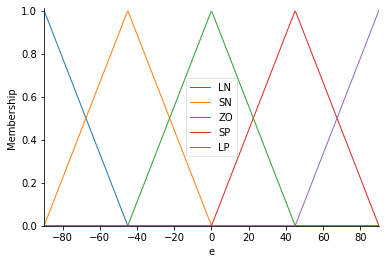

In [ ]:
membership_func(e)
e.view()

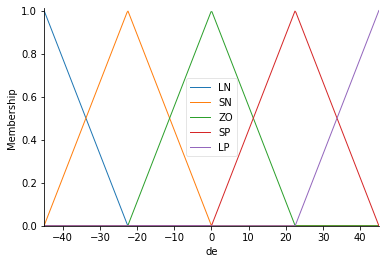

In [ ]:
membership_func(de)
de.view()

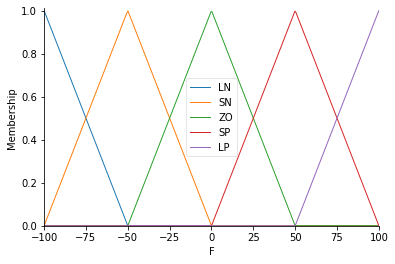

In [ ]:
membership_func(F)
F.view()

In [ ]:
rule1 = ctrl.Rule(antecedent = e['LN'] & de['LN'], consequent = F['LN'])
rule2 = ctrl.Rule(antecedent = e['LN'] & de['SN'], consequent = F['LN'])
rule3 = ctrl.Rule(antecedent = e['LN'] & de['ZO'], consequent = F['SN'])
rule4 = ctrl.Rule(antecedent = e['LN'] & de['SP'], consequent = F['SN'])
rule5 = ctrl.Rule(antecedent = e['LN'] & de['LN'], consequent = F['SN'])
rule6 = ctrl.Rule(antecedent = e['SN'] & de['LN'], consequent = F['LN'])
rule7 = ctrl.Rule(antecedent = e['SN'] & de['SN'], consequent = F['SN'])
rule8 = ctrl.Rule(antecedent = e['SN'] & de['ZO'], consequent = F['SN'])
rule9 = ctrl.Rule(antecedent = e['SN'] & de['SP'], consequent = F['SN'])
rule10 = ctrl.Rule(antecedent = e['SN'] & de['LP'], consequent = F['ZO'])
rule11 = ctrl.Rule(antecedent = e['ZO'] & de['LN'], consequent = F['SN'])
rule12 = ctrl.Rule(antecedent = e['ZO'] & de['SN'], consequent = F['SN'])

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

In [ ]:
# Create Antecedent variable
LS = ctrl.Antecedent(np.linspace(-0.2,2,100), label = 'LS') # 
RS = ctrl.Antecedent(np.linspace(-0.2,2,100), label = 'RS') # 
CS = ctrl.Antecedent(np.linspace(-0.2,2,100), label = 'CS') #
# Create Consequent variable
M1 = ctrl.Consequent(np.linspace(-100,100,360), label = 'M1') # VELOCITY OF MOTOR (RPM)
M2 = ctrl.Consequent(np.linspace(-100,100,360), label = 'M2') # VELOCITY OF MOTOR (RPM)

# **A Predictive Stock Market Technical Analysis Using Fuzzy Logic**

In [3]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Inputs
MACD = ctrl.Antecedent(np.linspace(0 ,10 ,100), 'MACD')
RSI  = ctrl.Antecedent(np.linspace(0 ,100,100), 'RSI')
SO   = ctrl.Antecedent(np.linspace(0 ,100,100), 'SO')
OBV  = ctrl.Antecedent(np.linspace(0 ,10 ,100), 'OBV')

# Output 
recommendation = ctrl.Consequent(np.linspace(0 ,30 ,100), 'REC')

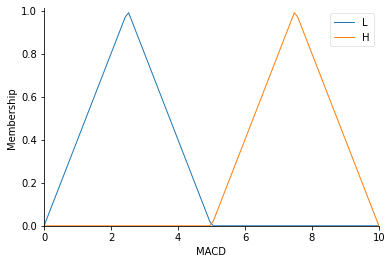

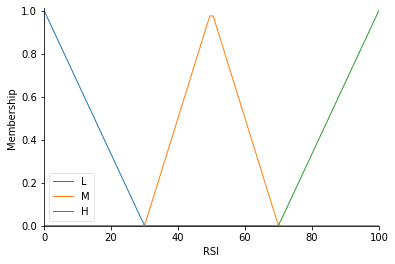

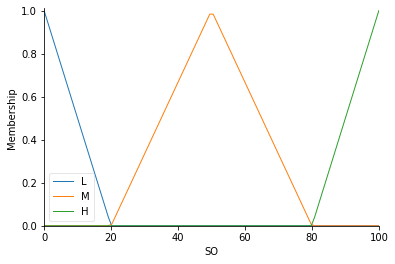

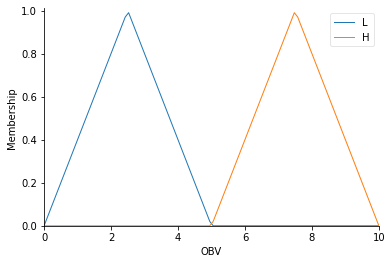

In [5]:
MACD['L'] = fuzz.trimf(MACD.universe,[0,2.5,5]) 
MACD['H'] = fuzz.trimf(MACD.universe,[5,7.5,10]) 
MACD.view()

RSI['L'] = fuzz.trimf(RSI.universe,[0,0,30]) 
RSI['M'] = fuzz.trimf(RSI.universe,[30,50,70]) 
RSI['H'] = fuzz.trimf(RSI.universe,[70,100,100]) 
RSI.view()

SO['L'] = fuzz.trimf(SO.universe,[0,0,20]) 
SO['M'] = fuzz.trimf(SO.universe,[20,50,80]) 
SO['H'] = fuzz.trimf(SO.universe,[80,100,100])
SO.view() 

OBV['L'] = fuzz.trimf(OBV.universe,[0,2.5,5]) 
OBV['H'] = fuzz.trimf(OBV.universe,[5,7.5,10]) 
OBV.view()

recommendation['sell'] = fuzz.trimf(recommendation.universe,[0,5,10]) 
recommendation['hold'] = fuzz.trimf(recommendation.universe,[10,15,20]) 
recommendation['buy'] = fuzz.trimf(recommendation.universe,[20,25,30]) 

In [6]:
rule = []
def MakeRule(f1,f2,f3,f4,c):
    rule.append(ctrl.Rule(MACD[f1] & RSI[f2] & SO[f3] & OBV[f4], recommendation[c]))

rule.append(ctrl.Rule(MACD['H'] & RSI['L'] & SO['L'] & OBV['H'], recommendation['buy']))
rule.append(ctrl.Rule(MACD['L'] & RSI['H'] & SO['H'] & OBV['L'], recommendation['buy']))
rule.append(ctrl.Rule(MACD['H'] & RSI['M'] & SO['M'] & OBV['H'], recommendation['buy']))
rule.append(ctrl.Rule(MACD['L'] & RSI['M'] & SO['H'] & OBV['L'], recommendation['sell']))
rule.append(ctrl.Rule(RSI['L'] & SO['L'] & OBV['H'], recommendation['buy']))
rule.append(ctrl.Rule(RSI['H'] & SO['H'] & OBV['L'], recommendation['sell']))
rule.append(ctrl.Rule(MACD['L'] & RSI['H'] & SO['H'], recommendation['sell']))
rule.append(ctrl.Rule(MACD['L'] & RSI['M'] & SO['M'], recommendation['hold']))
rule.append(ctrl.Rule(MACD['H'] & RSI['M'] & SO['M'] & OBV['L'], recommendation['hold']))

In [7]:
#Control system
recommendation_control = ctrl.ControlSystem(rule)
recommendation_simulation = ctrl.ControlSystemSimulation(recommendation_control)

In [10]:
# Compute
recommendation_simulation.input['MACD'] = 7.5
recommendation_simulation.input['RSI']  = 50
recommendation_simulation.input['SO']   = 50
recommendation_simulation.input['OBV']  = 7.5
recommendation_simulation.compute()
print(recommendation_simulation.output['REC'])

24.999999999999996


# **Adaptive Food Suggestion Engine**

In [11]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Create Antecedent variable
taste       = ctrl.Antecedent(np.linspace(0, 10, 100), 'Taste')
environment = ctrl.Antecedent(np.linspace(0, 10, 100), 'Environment')
budget      = ctrl.Antecedent(np.linspace(0, 9 , 100), 'Budget')
userReview  = ctrl.Antecedent(np.linspace(0, 5 , 100), 'User Review')
location    = ctrl.Antecedent(np.linspace(0, 3 , 100), 'Location')
# Create Consequent variable
preference = ctrl.Consequent(np.linspace(0, 15, 100), 'Preference')

In [13]:
# Membership functions
taste[1] = fuzz.gaussmf(taste.universe, 0, 2)
taste[2] = fuzz.gaussmf(taste.universe, 5, 2)
taste[3] = fuzz.gaussmf(taste.universe, 10, 2)

environment[1] = fuzz.gaussmf(environment.universe, 0, 2)
environment[2] = fuzz.gaussmf(environment.universe, 5, 2)
environment[3] = fuzz.gaussmf(environment.universe, 10, 2)

budget[3] = fuzz.gaussmf(budget.universe, 0, 1)
budget[2] = fuzz.gaussmf(budget.universe, 4.5, 1)
budget[1] = fuzz.gaussmf(budget.universe, 9, 1)

userReview[1] = fuzz.gaussmf(userReview.universe, 0, 0.5)
userReview[2] = fuzz.gaussmf(userReview.universe, 2.5, 0.5)
userReview[3] = fuzz.gaussmf(userReview.universe, 5, 0.5)

location[3] = fuzz.gaussmf(location.universe, 0, 0.5)
location[2] = fuzz.gaussmf(location.universe, 1.5, 0.5)
location[1] = fuzz.gaussmf(location.universe, 3, 0.5)

preference[1] = fuzz.gaussmf(preference.universe, 1.5, 1)
preference[2] = fuzz.gaussmf(preference.universe, 4.5, 1)
preference[3] = fuzz.gaussmf(preference.universe, 7.5, 1)
preference[4] = fuzz.gaussmf(preference.universe, 10.5, 1)
preference[5] = fuzz.gaussmf(preference.universe, 13.5, 1)

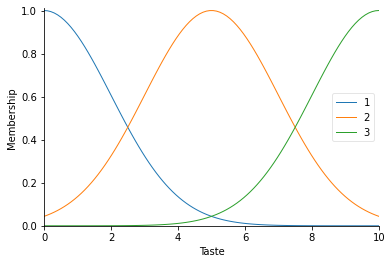

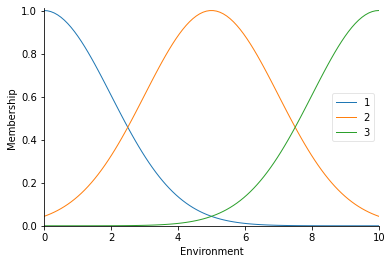

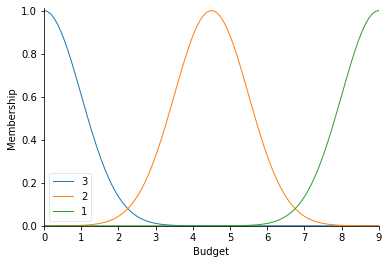

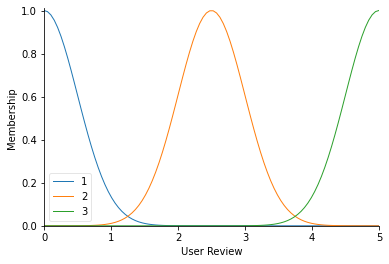

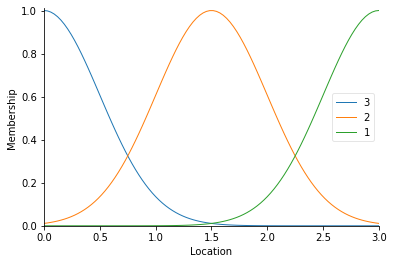

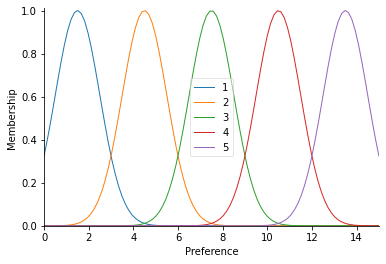

In [14]:
taste.view()
environment.view()
budget.view()
userReview.view()
location.view()

preference.view()

In [15]:
# Rules
rule = []
value = [1, 2, 3]

for i1 in value:
    for i2 in value:
        for i3 in value:
            for i4 in value:
                for i5 in value:
                    lvl = (i1 + i2 + i3 + i4 + i5) // 3
                    rule.append(ctrl.Rule(taste[i1] & environment[i2] & budget[i3] & userReview[i4] & location[i5], preference[lvl]))

In [16]:
#Control system
preferrence_control = ctrl.ControlSystem(rule)
preference_simulation = ctrl.ControlSystemSimulation(preferrence_control)

In [18]:
# Compute
preference_simulation.input['Taste'] = 8
preference_simulation.input['Environment'] = 7
preference_simulation.input['Budget'] = 2
preference_simulation.input['User Review'] = 5
preference_simulation.input['Location'] = 1

preference_simulation.compute()
print(preference_simulation.output['Preference'])

10.854328172198876


# **Transplant Patients**

In [19]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Input
Glycaemia    = ctrl.Antecedent(np.linspace(50, 150, 1000), 'GLY')
Sirolimus    = ctrl.Antecedent(np.linspace(0,  20, 1000), 'SIR')
Cyclosporine = ctrl.Antecedent(np.linspace(0,  20, 1000), 'CYC')
DiffACE      = ctrl.Antecedent(np.linspace(0,  10, 1000), 'DIF')
# Output 
Proteinuria = ctrl.Consequent(np.linspace(0, 4000, 1000), 'PRO')
GFR         = ctrl.Consequent(np.linspace(0,  100, 1000), 'GFR')

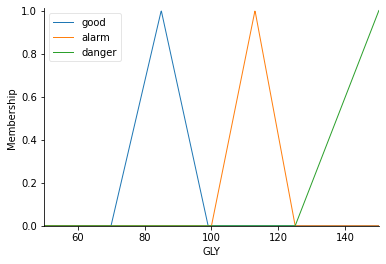

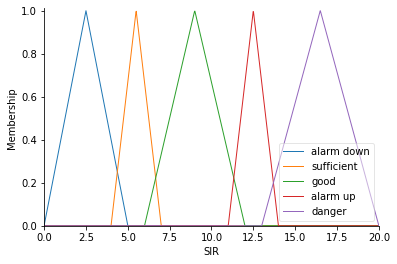

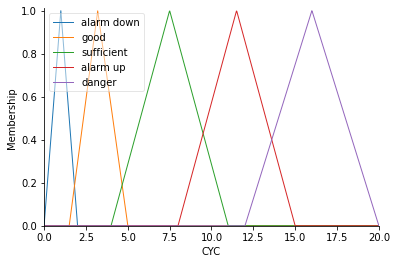

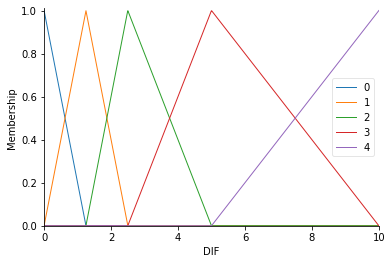

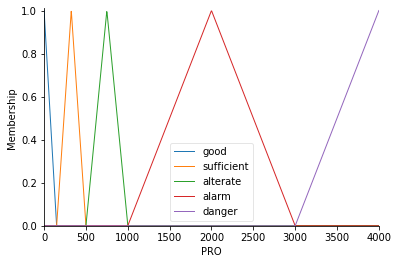

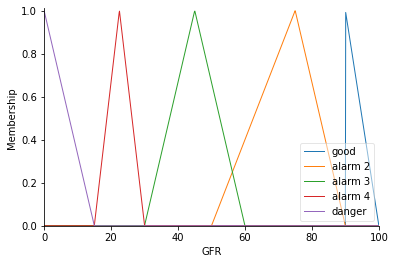

In [22]:
# Membership functions
Glycaemia['good']   = fuzz.trimf(Glycaemia.universe,[ 70,  85,  99])
Glycaemia['alarm']  = fuzz.trimf(Glycaemia.universe,[100, 113, 125])
Glycaemia['danger'] = fuzz.trimf(Glycaemia.universe,[125, 150, 150])
Glycaemia.view()

Sirolimus['alarm down'] = fuzz.trimf(Sirolimus.universe,[  0,   2.5,  5])
Sirolimus['sufficient'] = fuzz.trimf(Sirolimus.universe,[  4,   5.5,  7])
Sirolimus['good']       = fuzz.trimf(Sirolimus.universe,[  6,     9, 12])
Sirolimus['alarm up']   = fuzz.trimf(Sirolimus.universe,[ 11,  12.5, 14])
Sirolimus['danger']     = fuzz.trimf(Sirolimus.universe,[ 13,  16.5, 20])
Sirolimus.view()

Cyclosporine['alarm down']  = fuzz.trimf(Cyclosporine.universe,[  0,    1, 2 ])
Cyclosporine['good']        = fuzz.trimf(Cyclosporine.universe,[1.5,  3.2, 5 ])
Cyclosporine['sufficient']  = fuzz.trimf(Cyclosporine.universe,[  4,  7.5, 11])
Cyclosporine['alarm up']    = fuzz.trimf(Cyclosporine.universe,[  8, 11.5, 15])
Cyclosporine['danger']      = fuzz.trimf(Cyclosporine.universe,[ 12,   16, 20])
Cyclosporine.view()

DiffACE['0'] = fuzz.trimf(DiffACE.universe,[   0,    0, 1.25])
DiffACE['1'] = fuzz.trimf(DiffACE.universe,[   0, 1.25,  2.5])
DiffACE['2'] = fuzz.trimf(DiffACE.universe,[1.25,  2.5,    5])
DiffACE['3'] = fuzz.trimf(DiffACE.universe,[ 2.5,    5,   10])
DiffACE['4'] = fuzz.trimf(DiffACE.universe,[   5,   10,   10])
DiffACE.view()

Proteinuria['good']       = fuzz.trimf(Proteinuria.universe,[   0,    0, 150 ])
Proteinuria['sufficient'] = fuzz.trimf(Proteinuria.universe,[ 150,  325, 500 ])
Proteinuria['alterate']   = fuzz.trimf(Proteinuria.universe,[ 500,  750, 1000])
Proteinuria['alarm']      = fuzz.trimf(Proteinuria.universe,[1000, 2000, 3000])
Proteinuria['danger']      = fuzz.trimf(Proteinuria.universe,[3000, 4000, 4000])
Proteinuria.view()

GFR['good']  = fuzz.trimf(GFR.universe,[90,   90, 100])
GFR['alarm 2'] = fuzz.trimf(GFR.universe,[50,   75,  90])
GFR['alarm 3'] = fuzz.trimf(GFR.universe,[30,   45,  60])
GFR['alarm 4'] = fuzz.trimf(GFR.universe,[15, 22.5,  30])
GFR['danger']    = fuzz.trimf(GFR.universe,[ 0,    0,  15])

GFR.view()

In [23]:
ProtRule = []

ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['good'], Proteinuria['good']))
ProtRule.append(ctrl.Rule(Glycaemia['danger'] & Sirolimus['danger'], Proteinuria['danger']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['sufficient'], Proteinuria['sufficient']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['alarm up'], Proteinuria['alarm']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['sufficient'], Proteinuria['alterate']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm up'], Proteinuria['alterate']))
ProtRule.append(ctrl.Rule(Glycaemia['alarm'] & Sirolimus['good'], Proteinuria['sufficient']))
ProtRule.append(ctrl.Rule(Glycaemia['good'] & Sirolimus['alarm down'], Proteinuria['sufficient']))

#Control system
ProtFIS_control = ctrl.ControlSystem(ProtRule)
ProtFIS_simulation = ctrl.ControlSystemSimulation(ProtFIS_control)

In [24]:
GFRRule = []

GFRRule.append(ctrl.Rule(Glycaemia['danger'] & Cyclosporine['danger'], GFR['danger']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['danger'], GFR['alarm 3']))
GFRRule.append(ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['alarm up'], GFR['alarm 4']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['sufficient'], GFR['alarm 2']))
GFRRule.append(ctrl.Rule(Glycaemia['good'] & Cyclosporine['good'], GFR['good']))
GFRRule.append(ctrl.Rule(Glycaemia['alarm'] & Cyclosporine['good'], GFR['alarm 2']))
GFRRule.append(ctrl.Rule(Glycaemia['danger'] & Cyclosporine['good'], GFR['alarm 3']))

#Control system
GFRFIS_control = ctrl.ControlSystem(GFRRule)
GFRFIS_simulation = ctrl.ControlSystemSimulation(GFRFIS_control)

In [30]:
ProtACERule = []

ProtACERule.append(ctrl.Rule(DiffACE['2'], Proteinuria['sufficient']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['1'], Proteinuria['sufficient']))
ProtACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['1'], Proteinuria['alterate']))
ProtACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['1'], Proteinuria['alarm']))
ProtACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['3'], Proteinuria['alarm']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['3'], Proteinuria['alterate']))
ProtACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['4'], Proteinuria['danger']))
ProtACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['0'], Proteinuria['good']))

#Control system
ProtACE_control = ctrl.ControlSystem(ProtACERule)
ProtACE_simulation = ctrl.ControlSystemSimulation(ProtACE_control)

In [31]:
GFRACERule = []

GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['2'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['2'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['1'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['alarm'] & DiffACE['1'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['3'], GFR['alarm 3']))
GFRACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['3'], GFR['alarm 4']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['4'], GFR['alarm 2']))
GFRACERule.append(ctrl.Rule(Glycaemia['good'] & DiffACE['0'], GFR['good']))
GFRACERule.append(ctrl.Rule(Glycaemia['danger'] & DiffACE['4'], GFR['danger']))

#Control system
GFRACE_control = ctrl.ControlSystem(GFRACERule)
GFRACE_simulation = ctrl.ControlSystemSimulation(GFRACE_control)

55.57164274545485
87.53620995249571
53.19329426074221
93.55931843241494


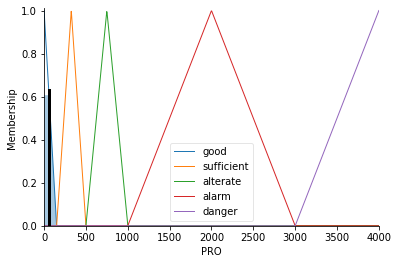

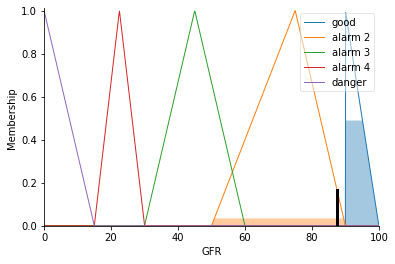

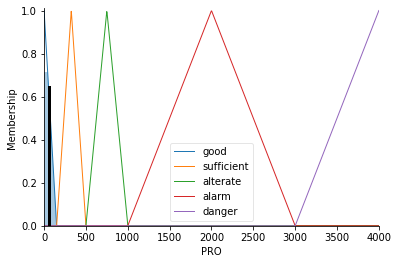

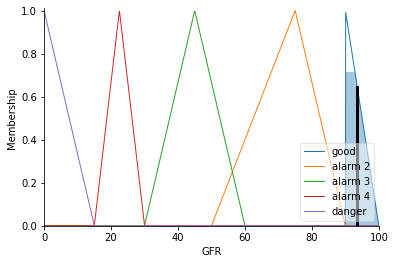

In [32]:
# Compute
ProtFIS_simulation.input['GLY'] = 90
ProtFIS_simulation.input['SIR'] = 7.82

GFRFIS_simulation.input['GLY'] = 142
GFRFIS_simulation.input['CYC'] = 4.12

ProtACE_simulation.input['GLY'] = 89
ProtACE_simulation.input['DIF'] = 2.5

GFRACE_simulation.input['GLY'] = 89
GFRACE_simulation.input['DIF'] = -2.5

ProtFIS_simulation.compute()
print(ProtFIS_simulation.output['PRO'])
Proteinuria.view(sim = ProtFIS_simulation)

GFRFIS_simulation.compute()
print(GFRFIS_simulation.output['GFR'])
GFR.view(sim = GFRFIS_simulation)

ProtACE_simulation.compute()
print(ProtACE_simulation.output['PRO'])
Proteinuria.view(sim = ProtACE_simulation)

GFRACE_simulation.compute()
print(GFRACE_simulation.output['GFR'])
GFR.view(sim = GFRACE_simulation)

# **Nutritional Needs Recommendation**

In [33]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Inputs
BMI = ctrl.Antecedent(np.linspace(0 ,40, 1000), 'BMI')
ACT = ctrl.Antecedent(np.linspace(1.3 ,2.1,1000), 'ACTIVITY')
# Output 
kcal = ctrl.Consequent(np.linspace(0 ,5000 ,1000), 'CAL')

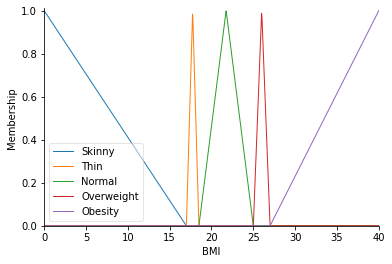

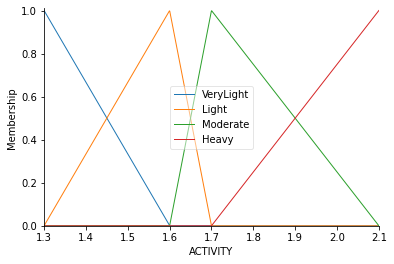

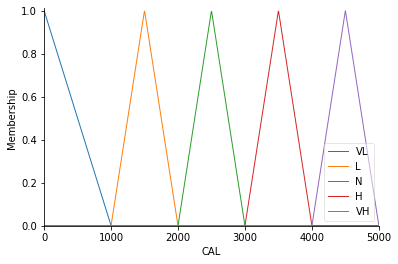

In [36]:
BMI['Skinny']     = fuzz.trimf(BMI.universe,[   0,     0, 17  ]) 
BMI['Thin']       = fuzz.trimf(BMI.universe,[  17, 17.75, 18.5]) 
BMI['Normal']     = fuzz.trimf(BMI.universe,[18.5, 21.75, 25  ]) 
BMI['Overweight'] = fuzz.trimf(BMI.universe,[  25,    26, 27  ]) 
BMI['Obesity']    = fuzz.trimf(BMI.universe,[  27,    40, 40  ]) 
BMI.view()

ACT['VeryLight'] = fuzz.trimf(ACT.universe,[1.3, 1.3, 1.6]) 
ACT['Light']     = fuzz.trimf(ACT.universe,[1.3, 1.6, 1.7]) 
ACT['Moderate']  = fuzz.trimf(ACT.universe,[1.6, 1.7, 2.1])
ACT['Heavy']     = fuzz.trimf(ACT.universe,[1.7, 2.1, 2.1])
ACT.view() 

kcal['VL'] = fuzz.trimf(kcal.universe,[0   ,    0, 1000]) 
kcal['L']  = fuzz.trimf(kcal.universe,[1000, 1500, 2000]) 
kcal['N']  = fuzz.trimf(kcal.universe,[2000, 2500, 3000])
kcal['H']  = fuzz.trimf(kcal.universe,[3000, 3500, 4000])
kcal['VH'] = fuzz.trimf(kcal.universe,[4000, 4500, 5000])
kcal.view()

In [37]:
rule = []

rule.append(ctrl.Rule(BMI['Skinny'], kcal['VH']))

rule.append(ctrl.Rule(BMI['Thin'] & ACT['VeryLight'], kcal['H']))
rule.append(ctrl.Rule(BMI['Thin'] & ACT['Light']    , kcal['H']))
rule.append(ctrl.Rule(BMI['Thin'] & ACT['Moderate'] , kcal['VH']))
rule.append(ctrl.Rule(BMI['Thin'] & ACT['Heavy']    , kcal['VH']))

rule.append(ctrl.Rule(BMI['Normal'] & ACT['VeryLight'], kcal['N']))
rule.append(ctrl.Rule(BMI['Normal'] & ACT['Light']    , kcal['N']))
rule.append(ctrl.Rule(BMI['Normal'] & ACT['Moderate'] , kcal['H']))
rule.append(ctrl.Rule(BMI['Normal'] & ACT['Heavy']    , kcal['H']))

rule.append(ctrl.Rule(BMI['Overweight'] & ACT['VeryLight'], kcal['L']))
rule.append(ctrl.Rule(BMI['Overweight'] & ACT['Light']    , kcal['L']))
rule.append(ctrl.Rule(BMI['Overweight'] & ACT['Moderate'] , kcal['L']))
rule.append(ctrl.Rule(BMI['Overweight'] & ACT['Heavy']    , kcal['N']))

rule.append(ctrl.Rule(BMI['Obesity'] & ACT['VeryLight'], kcal['L']))
rule.append(ctrl.Rule(BMI['Obesity'] & ACT['Light']    , kcal['VL']))
rule.append(ctrl.Rule(BMI['Obesity'] & ACT['Moderate'] , kcal['VL']))
rule.append(ctrl.Rule(BMI['Obesity'] & ACT['Heavy']    , kcal['VL']))

In [38]:
#Control system
kcal_control = ctrl.ControlSystem(rule)
kcal_simulation = ctrl.ControlSystemSimulation(kcal_control)

972.4235443218308


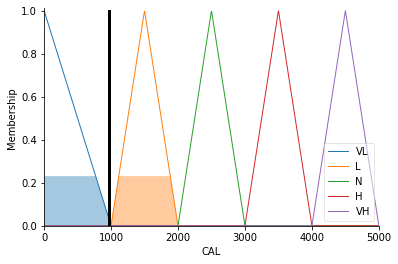

In [39]:
# Compute
kcal_simulation.input['BMI'] = 30
kcal_simulation.input['ACTIVITY'] = 1.4

kcal_simulation.compute()
print(kcal_simulation.output['CAL'])

# Kcal
kcal.view(sim = kcal_simulation)